In [1]:
import numpy as np
import pandas as pd
import keras as kr
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#import scikitplot as skplt
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
signals_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/signal_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
signals_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/signal_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
signals_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/signal_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

signals = pd.concat([signals_2016, signals_2017, signals_2018])
#signals['type'] = 1

del signals_2016
del signals_2017
del signals_2018

signals.set_axis(range(0, len(signals)), axis='index', inplace=True)
#signals.drop(labels=range(10, len(signals)), axis=0, inplace=True)
signal_np = signals.to_numpy()

GluGluHToWWTo2L2Nu_M125_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/GluGluHToWWTo2L2Nu_M125_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
GluGluHToWWTo2L2Nu_M125_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/GluGluHToWWTo2L2Nu_M125_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
GluGluHToWWTo2L2Nu_M125_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/GluGluHToWWTo2L2Nu_M125_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

GluGluHToWWTo2L2Nu_M125_df = pd.concat([GluGluHToWWTo2L2Nu_M125_2016, GluGluHToWWTo2L2Nu_M125_2017, GluGluHToWWTo2L2Nu_M125_2018])

TTTo2L2Nu_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/TTTo2L2Nu_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
TTTo2L2Nu_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/TTTo2L2Nu_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
TTTo2L2Nu_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/TTTo2L2Nu_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

TTTo2L2Nu_2016.drop(labels=range(71000, len(TTTo2L2Nu_2016)), axis=0, inplace=True)
TTTo2L2Nu_2017.drop(labels=range(85000, len(TTTo2L2Nu_2017)), axis=0, inplace=True)
TTTo2L2Nu_2018.drop(labels=range(89000, len(TTTo2L2Nu_2018)), axis=0, inplace=True)

TTTo2L2Nu_df = pd.concat([TTTo2L2Nu_2016, TTTo2L2Nu_2017, TTTo2L2Nu_2018])

del TTTo2L2Nu_2016
del TTTo2L2Nu_2017
del TTTo2L2Nu_2018

WWTo2L2Nu_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/WWTo2L2Nu_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
WWTo2L2Nu_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/WWTo2L2Nu_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
WWTo2L2Nu_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/WWTo2L2Nu_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

WWTo2L2Nu_2016.drop(labels=range(71000, len(WWTo2L2Nu_2016)), axis=0, inplace=True)
WWTo2L2Nu_2017.drop(labels=range(85000, len(WWTo2L2Nu_2017)), axis=0, inplace=True)
WWTo2L2Nu_2018.drop(labels=range(89000, len(WWTo2L2Nu_2018)), axis=0, inplace=True)

WWTo2L2Nu_df = pd.concat([WWTo2L2Nu_2016, WWTo2L2Nu_2017, WWTo2L2Nu_2018])

del WWTo2L2Nu_2016
del WWTo2L2Nu_2017
del WWTo2L2Nu_2018

backgrounds = pd.concat([GluGluHToWWTo2L2Nu_M125_df, TTTo2L2Nu_df, WWTo2L2Nu_df])
#backgrounds['type'] = 0

del GluGluHToWWTo2L2Nu_M125_df
del TTTo2L2Nu_df
del WWTo2L2Nu_df

backgrounds.set_axis(range(0, len(backgrounds)), axis='index', inplace=True)
#backgrounds.drop(labels=range(10, len(backgrounds)), axis=0, inplace=True)
background_np = backgrounds.to_numpy()

In [3]:
signal_np = np.insert(arr=signal_np, obj=signal_np.shape[1], values=np.ones(signal_np.shape[0]), axis=1)
background_np = np.insert(arr=background_np, obj=background_np.shape[1], values=np.zeros(background_np.shape[0]), axis=1)

all_data = np.concatenate([signal_np, background_np])
all_data = np.take(all_data,np.random.permutation(all_data.shape[0]),axis=0,out=all_data)


In [4]:
all_data = np.delete(all_data,range(1000000, len(all_data)),0)
all_data.shape

(1000000, 18)

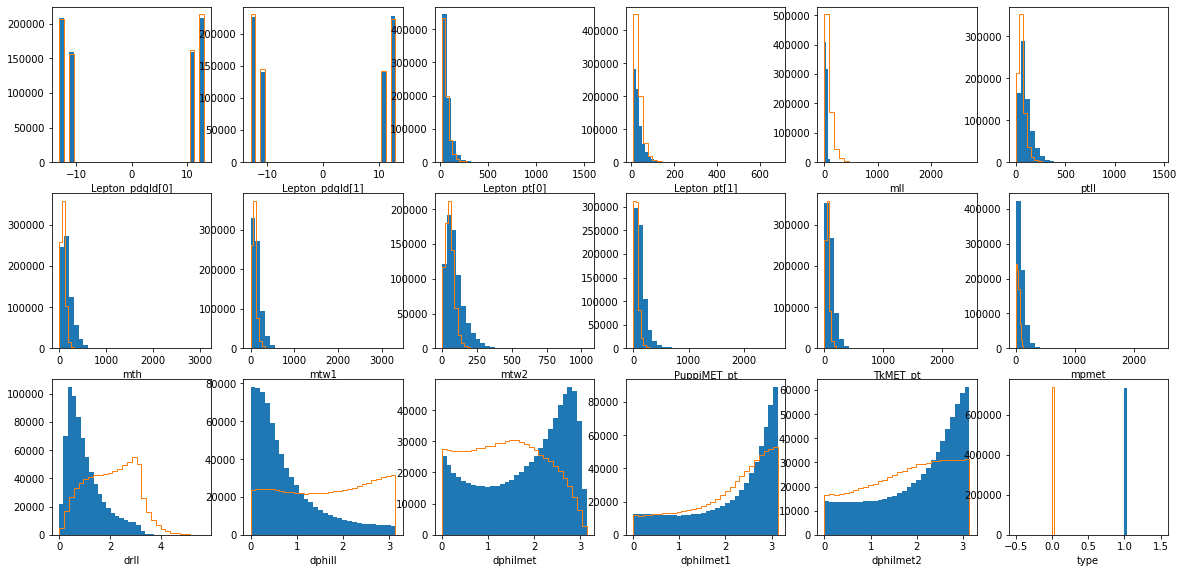

In [5]:
variable = ['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2', 'type']
plt.figure(figsize=(20,20))
for i in np.arange(signal_np.shape[1]):
    plt.subplot(6,6,i+1)
    plt.hist(signal_np[:,i], bins=30)
    plt.hist(background_np[:,i], bins=30, histtype='step')
    plt.xlabel(variable[i])

In [6]:
all_data.shape

(1000000, 18)

In [7]:
X = all_data[:,:17]
Y = all_data[:,17].astype(int)

In [8]:
for j in range(0,X.shape[1]-2):
    mean = np.mean(X[:,j])
    std = np.std(X[:,j])
    for i in range(0,X.shape[0]):
        X[i,j] = X[i,j] - mean
        X[i,j] = X[i,j] / std

In [9]:
# fraction of the data to assign to the test set
test_size = 0.01

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)

print('Size of X_train is: '+str(X_train.shape))
print('Size of X_test is: '+str(X_test.shape))

Size of X_train is: (990000, 17)
Size of X_test is: (10000, 17)


In [10]:
K.clear_session()

model = kr.models.Sequential()
model.add(kr.layers.Dense(100, input_shape=X.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(kr.layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
#model.add(kr.layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
#model.add(kr.layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(kr.layers.Dense(100, activation='relu'))
model.add(kr.layers.Dense(1, activation='sigmoid'))

In [11]:
opt = kr.optimizers.RMSprop(lr=0.0005)

In [12]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train,Y_train,epochs = 20, verbose=0)

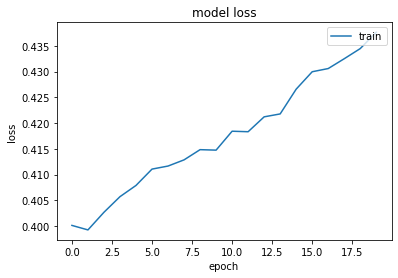

In [14]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
plt.legend(['train'], loc='upper right')
plt.show()

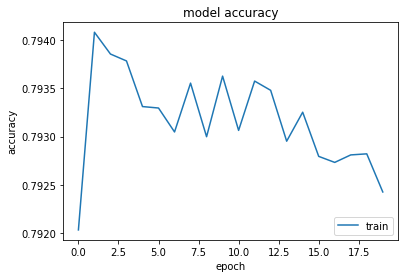

In [15]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='lower right')
plt.legend(['train'], loc='lower right')
plt.show()

In [16]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 0s 502us/step - loss: 0.4164 - accuracy: 0.7968
Test loss: 0.41636034846305847
Test accuracy: 0.7968000173568726


In [17]:
Y_pred = model.predict_proba(X_test)
roc_auc_score(Y_test, Y_pred)

/Users/Diego/Pruebas/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.8965331768823044

/Users/Diego/Pruebas/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


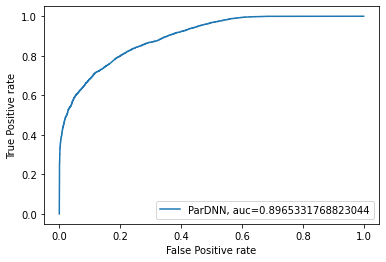

In [18]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ParDNN, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()